## Import the Libraries

In [1]:
import turicreate

## Load the Datasets

In [2]:
housing_data = turicreate.SFrame('Data/home_data.sframe')
housing_data.head(5)

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat
0,3,7.0,1180.0,0.0,1955.0,0.0,98178,47.51123398
0,3,7.0,2170.0,400.0,1951.0,1991.0,98125,47.72102274
0,3,6.0,770.0,0.0,1933.0,0.0,98028,47.73792661
0,5,7.0,1050.0,910.0,1965.0,0.0,98136,47.52082


## Let's Visualize the Housing data

In [3]:
housing_data.show()

Materializing SFrame

Warning: Skipping column 'date'. Unable to show columns of type 'datetime'; only [int, float, str] can be shown.

Further warnings of unsupported type will be suppressed.

In [5]:
turicreate.show(housing_data[1:5000]['sqft_living'],housing_data[1:5000]['price'])

Materializing X axis SArray

Materializing Y axis SArray

## Simple Regression Model that predicts the price from sqft

In [7]:
training_data, testing_data = housing_data.random_split(0.8, seed=0.2)

In [11]:
sqft_model = turicreate.linear_regression.create(training_data, target='price', features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.005221     | 4339341.450708     | 1880301.623223       | 263366.237915                   | 254823.287840                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

## Evaluate the simple Regression model

In [12]:
print(testing_data['price'].mean())

543054.0425632532


In [13]:
print(sqft_model.evaluate(testing_data))

{'max_error': 4135576.371996805, 'rmse': 255215.7620668855}


## Visualize the predictions from the simple Regression model

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

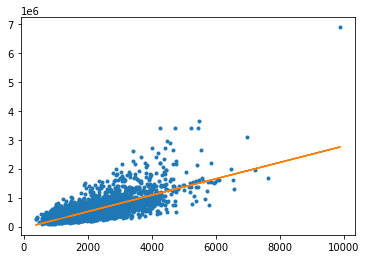

In [20]:
plt.plot(testing_data['sqft_living'],testing_data['price'],'.',
        testing_data['sqft_living'],sqft_model.predict(testing_data),'-')

In [21]:
# Model coefficients
sqft_model.coefficients

name,index,value,stderr
(intercept),None,-49239.96993314964,5053.720442576586
sqft_living,None,282.9791302261218,2.221392166822233


## Explore the other features in the data

In [22]:
my_features = my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [24]:
housing_data[my_features].show()

Materializing SFrame

In [25]:
turicreate.show(housing_data['zipcode'],housing_data['price'])

Materializing X axis SArray

Materializing Y axis SArray

## Build a regression model with more features

In [26]:
complex_model = turicreate.linear_regression.create(training_data, target='price', features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.045799     | 4105903.317802     | 2219805.400742       | 189400.817123                   | 186186.475657                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

## Let's see how differently sqft model and the complex model perform

In [29]:
print(sqft_model.evaluate(testing_data))
print(complex_model.evaluate(testing_data))

{'max_error': 4135576.371996805, 'rmse': 255215.7620668855}
{'max_error': 3155063.2857242166, 'rmse': 180348.430981317}


## Apply learned models to predict the prices 

In [30]:
house1 = housing_data[housing_data['id'] == '5309101200']
house1

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000.0 |   4.0    |    2.25   |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    2400.0   |  5350.0  |  1.5   |     0      |  0   |     4     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1460.0   |     940.0     |  1929.0  |     0.0      |  98117  | 47.67632376 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.37010126 |     1250.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src='Data/house_images/house1.png' style="width:400px;height:400px;">

In [37]:
print("The actual price of the house: {}".format(house1['price']))
print("The price of the house predicted by the sqft model: {}".format(sqft_model.predict(house1)))
print("The price of the house predicted by the complex model: {}".format(complex_model.predict(house1)))

The actual price of the house: [620000.0]
The price of the house predicted by the sqft model: [629909.9426095427]
The price of the house predicted by the complex model: [728035.9144756737]


In [38]:
house2 = housing_data[housing_data['id'] =='1925069082']
house2

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000.0 |   5.0    |    4.25   |
+------------+---------------------------+-----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    4640.0   | 22703.0  |  2.0   |     1      |  4   |     5     |  8.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   2860.0   |     1780.0    |  1952.0  |     0.0      |  98052  | 47.63925783 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.09722322 |     3140.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src='Data/house_images/house2.jpg' style="width:600px;height:400px;">

In [39]:
print("The actual price of the house: {}".format(house2['price']))
print("The price of the house predicted by the sqft model: {}".format(sqft_model.predict(house2)))
print("The price of the house predicted by the complex model: {}".format(complex_model.predict(house2)))

The actual price of the house: [2200000.0, ... ]
The price of the house predicted by the sqft model: [1263783.1943160556]
The price of the house predicted by the complex model: [1229623.4775223138]


## Predict Bill Gates House price

In [40]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src='Data/house_images/bill_gates.png' style="width:600px;height:400px;">

In [41]:
print("The price of Bill Gates' House: {}".format(complex_model.predict(turicreate.SFrame(bill_gates))))

The price of Bill Gates' House: [14964001.111785483]


# Exercise Questions

In [42]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [43]:
advanced_model = turicreate.linear_regression.create(training_data, target='price', features=advanced_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 87

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.103220     | 4326361.745268     | 1369871.777799       | 163217.586455                   | 146528.702705                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [44]:
print(sqft_model.evaluate(testing_data))
print(complex_model.evaluate(testing_data))
print(advanced_model.evaluate(testing_data))

{'max_error': 4135576.371996805, 'rmse': 255215.7620668855}
{'max_error': 3155063.2857242166, 'rmse': 180348.430981317}
{'max_error': 3162144.5876856465, 'rmse': 155509.7118366836}


In [54]:
print("The fraction of the houses have living space between 2000 sq.ft. and 4000 sq.ft.")
round(len(housing_data[(housing_data['sqft_living'] >2000) & (housing_data['sqft_living'] < 4000)])/len(housing_data),3)

The fraction of the houses have living space between 2000 sq.ft. and 4000 sq.ft.


0.422

In [67]:
import turicreate.aggregate as agg
zipcodes = housing_data.groupby(key_column_names='zipcode', operations={'price': agg.MEAN('price')})
zipcodes.sort('price', ascending=False)

zipcode,price
98039,2160606.6
98004,1355927.097791798
98040,1194230.003546099
98112,1095499.3680297397
98102,901258.2380952381
98109,879623.6238532111
98105,862825.2314410482
98006,859684.7630522086
98119,849448.0108695652
98005,810164.880952381
